In [1]:
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

import numpy as np
import sklearn

from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#from sklearn.metrics import mean_absolute_percentage_error
#from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ordinal = pd.read_csv('../../../Data/BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
ordinal.head(3)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,GrLivArea,SalePrice,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,6.0,5.0,1.0,1.0,3.0,3.0,0.0,0.0,0.0,21.0,2.0,2.0,0.0,2.0,1.0,0.0,13.0,14.0,2.0,3.0,4.0,1.0,5.0,5.0,3.0,5.0,6.0,1.0,4.0,1.0,4.0,4.0,6.0,2.0,5.0,3.0,5.0,5.0,2.0,3.0,4.0,1.0,5.0,4.0,9.0,4.0,856,126000,68.516053,7890,6,6,1939,1950,0.0,238.0,0.0,618.0,856.0,856,0,0,1.0,0.0,1,0,2,1,4,1,1939.0,2.0,399.0,0,0,0,0,166,0,0
1,0.0,5.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,7.0,2.0,2.0,4.0,2.0,1.0,0.0,6.0,6.0,1.0,2.0,4.0,1.0,2.0,5.0,2.0,2.0,0.0,1.0,4.0,1.0,4.0,2.0,6.0,3.0,1.0,0.0,5.0,5.0,2.0,3.0,4.0,1.0,4.0,3.0,9.0,4.0,1049,139500,42.000000,4235,5,5,1984,1984,149.0,552.0,393.0,104.0,1049.0,1049,0,0,1.0,0.0,2,0,2,1,5,0,1984.0,1.0,266.0,0,105,0,0,0,0,0
2,6.0,1.0,1.0,1.0,3.0,3.0,0.0,4.0,0.0,11.0,2.0,2.0,0.0,2.0,3.0,0.0,8.0,8.0,2.0,2.0,4.0,0.0,5.0,5.0,3.0,0.0,6.0,1.0,0.0,1.0,4.0,2.0,6.0,3.0,5.0,3.0,5.0,4.0,0.0,3.0,4.0,1.0,2.0,1.0,9.0,4.0,1001,124900,60.000000,6060,5,9,1930,2007,0.0,737.0,0.0,100.0,837.0,1001,0,0,0.0,0.0,1,0,2,1,5,0,1930.0,1.0,216.0,154,0,42,86,0,0,0


In [5]:
X = ordinal.drop(['SalePrice'], axis=1)
y = np.log10(ordinal.SalePrice)

(array([  1.,   0.,   5.,  27., 147., 883., 985., 421., 101.,  10.]),
 array([4.10683659, 4.28394762, 4.46105866, 4.6381697 , 4.81528073,
        4.99239177, 5.16950281, 5.34661384, 5.52372488, 5.70083592,
        5.87794695]),
 <BarContainer object of 10 artists>)

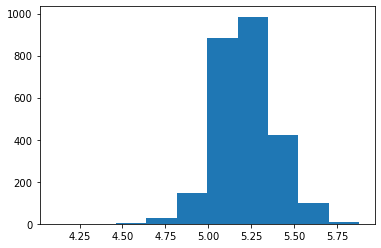

In [6]:
plt.hist(y)

In [7]:
CB = CatBoostRegressor()

In [8]:

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25)
    
CB.fit(X_train, Y_train, verbose=False)
y_pred = CB.predict(X_test)

CB_Score = r2_score(Y_test, y_pred)
CB_Score
    

0.9189466034121558

In [9]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error',
          }

In [10]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, 
                                  cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [11]:
dfs = evaluate_model(CatBoostRegressor(), X, y)

Learning rate set to 0.04591
0:	learn: 0.1642088	total: 66.2ms	remaining: 1m 6s
1:	learn: 0.1591388	total: 70.1ms	remaining: 35s
2:	learn: 0.1544313	total: 78.8ms	remaining: 26.2s
3:	learn: 0.1497359	total: 101ms	remaining: 25.2s
4:	learn: 0.1458073	total: 109ms	remaining: 21.7s
5:	learn: 0.1416382	total: 115ms	remaining: 19s
6:	learn: 0.1377576	total: 118ms	remaining: 16.8s
7:	learn: 0.1340042	total: 124ms	remaining: 15.4s
8:	learn: 0.1302565	total: 132ms	remaining: 14.5s
9:	learn: 0.1266693	total: 141ms	remaining: 14s
10:	learn: 0.1233402	total: 145ms	remaining: 13s
11:	learn: 0.1198340	total: 151ms	remaining: 12.4s
12:	learn: 0.1166678	total: 155ms	remaining: 11.8s
13:	learn: 0.1136661	total: 160ms	remaining: 11.3s
14:	learn: 0.1106904	total: 165ms	remaining: 10.8s
15:	learn: 0.1078673	total: 173ms	remaining: 10.7s
16:	learn: 0.1053449	total: 179ms	remaining: 10.3s
17:	learn: 0.1029052	total: 184ms	remaining: 10s
18:	learn: 0.1007175	total: 189ms	remaining: 9.77s
19:	learn: 0.098283

Learning rate set to 0.04591
0:	learn: 0.1645248	total: 61.2ms	remaining: 1m 1s
1:	learn: 0.1599829	total: 63.9ms	remaining: 31.9s
2:	learn: 0.1550582	total: 68.6ms	remaining: 22.8s
3:	learn: 0.1506525	total: 73.8ms	remaining: 18.4s
4:	learn: 0.1463991	total: 77.6ms	remaining: 15.4s
5:	learn: 0.1425532	total: 84.6ms	remaining: 14s
6:	learn: 0.1387655	total: 93.7ms	remaining: 13.3s
7:	learn: 0.1350208	total: 105ms	remaining: 13.1s
8:	learn: 0.1316518	total: 111ms	remaining: 12.2s
9:	learn: 0.1279348	total: 116ms	remaining: 11.5s
10:	learn: 0.1243883	total: 126ms	remaining: 11.3s
11:	learn: 0.1212642	total: 133ms	remaining: 11s
12:	learn: 0.1183066	total: 142ms	remaining: 10.8s
13:	learn: 0.1153611	total: 151ms	remaining: 10.7s
14:	learn: 0.1124433	total: 156ms	remaining: 10.3s
15:	learn: 0.1099308	total: 161ms	remaining: 9.9s
16:	learn: 0.1072908	total: 171ms	remaining: 9.88s
17:	learn: 0.1048110	total: 177ms	remaining: 9.68s
18:	learn: 0.1024120	total: 184ms	remaining: 9.49s
19:	learn:

160:	learn: 0.0394749	total: 919ms	remaining: 4.79s
161:	learn: 0.0393883	total: 924ms	remaining: 4.78s
162:	learn: 0.0392802	total: 927ms	remaining: 4.76s
163:	learn: 0.0391799	total: 938ms	remaining: 4.78s
164:	learn: 0.0391097	total: 944ms	remaining: 4.78s
165:	learn: 0.0390267	total: 948ms	remaining: 4.76s
166:	learn: 0.0389925	total: 953ms	remaining: 4.75s
167:	learn: 0.0389359	total: 957ms	remaining: 4.74s
168:	learn: 0.0388791	total: 964ms	remaining: 4.74s
169:	learn: 0.0388254	total: 968ms	remaining: 4.73s
170:	learn: 0.0387541	total: 975ms	remaining: 4.72s
171:	learn: 0.0387119	total: 979ms	remaining: 4.71s
172:	learn: 0.0386513	total: 986ms	remaining: 4.71s
173:	learn: 0.0386137	total: 990ms	remaining: 4.7s
174:	learn: 0.0385395	total: 1s	remaining: 4.71s
175:	learn: 0.0384675	total: 1.01s	remaining: 4.71s
176:	learn: 0.0384085	total: 1.01s	remaining: 4.7s
177:	learn: 0.0383307	total: 1.01s	remaining: 4.68s
178:	learn: 0.0382751	total: 1.02s	remaining: 4.67s
179:	learn: 0.038

160:	learn: 0.0392815	total: 1.07s	remaining: 5.61s
161:	learn: 0.0392277	total: 1.08s	remaining: 5.59s
162:	learn: 0.0391620	total: 1.08s	remaining: 5.58s
163:	learn: 0.0391320	total: 1.09s	remaining: 5.55s
164:	learn: 0.0390873	total: 1.09s	remaining: 5.53s
165:	learn: 0.0389847	total: 1.1s	remaining: 5.51s
166:	learn: 0.0389215	total: 1.11s	remaining: 5.53s
167:	learn: 0.0388009	total: 1.11s	remaining: 5.5s
168:	learn: 0.0387606	total: 1.11s	remaining: 5.48s
169:	learn: 0.0386972	total: 1.12s	remaining: 5.46s
170:	learn: 0.0386609	total: 1.13s	remaining: 5.46s
171:	learn: 0.0386027	total: 1.13s	remaining: 5.45s
172:	learn: 0.0385414	total: 1.14s	remaining: 5.43s
173:	learn: 0.0384850	total: 1.15s	remaining: 5.44s
174:	learn: 0.0384145	total: 1.15s	remaining: 5.42s
175:	learn: 0.0383335	total: 1.16s	remaining: 5.43s
176:	learn: 0.0382859	total: 1.16s	remaining: 5.41s
177:	learn: 0.0382049	total: 1.17s	remaining: 5.41s
178:	learn: 0.0380868	total: 1.18s	remaining: 5.4s
179:	learn: 0.0

217:	learn: 0.0360876	total: 1.45s	remaining: 5.21s
218:	learn: 0.0360256	total: 1.46s	remaining: 5.2s
219:	learn: 0.0359593	total: 1.46s	remaining: 5.19s
220:	learn: 0.0358850	total: 1.47s	remaining: 5.18s
221:	learn: 0.0358249	total: 1.48s	remaining: 5.17s
222:	learn: 0.0357398	total: 1.48s	remaining: 5.16s
223:	learn: 0.0357155	total: 1.49s	remaining: 5.15s
224:	learn: 0.0356575	total: 1.49s	remaining: 5.14s
225:	learn: 0.0356129	total: 1.5s	remaining: 5.12s
226:	learn: 0.0355617	total: 1.5s	remaining: 5.11s
227:	learn: 0.0355115	total: 1.5s	remaining: 5.09s
228:	learn: 0.0354394	total: 1.51s	remaining: 5.09s
229:	learn: 0.0354185	total: 1.52s	remaining: 5.08s
230:	learn: 0.0353738	total: 1.52s	remaining: 5.07s
231:	learn: 0.0352889	total: 1.53s	remaining: 5.06s
232:	learn: 0.0352240	total: 1.54s	remaining: 5.06s
233:	learn: 0.0351562	total: 1.54s	remaining: 5.05s
234:	learn: 0.0350845	total: 1.55s	remaining: 5.05s
235:	learn: 0.0350293	total: 1.56s	remaining: 5.05s
236:	learn: 0.03

319:	learn: 0.0309920	total: 2.12s	remaining: 4.51s
320:	learn: 0.0309676	total: 2.13s	remaining: 4.5s
321:	learn: 0.0309203	total: 2.13s	remaining: 4.49s
322:	learn: 0.0308851	total: 2.14s	remaining: 4.48s
323:	learn: 0.0308715	total: 2.15s	remaining: 4.48s
324:	learn: 0.0308351	total: 2.15s	remaining: 4.48s
325:	learn: 0.0307878	total: 2.16s	remaining: 4.46s
326:	learn: 0.0307417	total: 2.17s	remaining: 4.46s
327:	learn: 0.0307299	total: 2.17s	remaining: 4.45s
328:	learn: 0.0307046	total: 2.18s	remaining: 4.44s
329:	learn: 0.0306905	total: 2.18s	remaining: 4.44s
330:	learn: 0.0306736	total: 2.19s	remaining: 4.42s
331:	learn: 0.0306173	total: 2.19s	remaining: 4.41s
332:	learn: 0.0305587	total: 2.2s	remaining: 4.4s
333:	learn: 0.0304849	total: 2.2s	remaining: 4.4s
334:	learn: 0.0304569	total: 2.21s	remaining: 4.39s
335:	learn: 0.0304195	total: 2.21s	remaining: 4.38s
336:	learn: 0.0303873	total: 2.22s	remaining: 4.38s
337:	learn: 0.0303401	total: 2.23s	remaining: 4.37s
338:	learn: 0.030

319:	learn: 0.0311870	total: 2.12s	remaining: 4.5s
320:	learn: 0.0311603	total: 2.13s	remaining: 4.5s
321:	learn: 0.0311381	total: 2.13s	remaining: 4.49s
322:	learn: 0.0310801	total: 2.14s	remaining: 4.49s
323:	learn: 0.0310348	total: 2.14s	remaining: 4.47s
324:	learn: 0.0309833	total: 2.15s	remaining: 4.46s
325:	learn: 0.0309317	total: 2.16s	remaining: 4.46s
326:	learn: 0.0309197	total: 2.17s	remaining: 4.46s
327:	learn: 0.0308794	total: 2.17s	remaining: 4.45s
328:	learn: 0.0308456	total: 2.18s	remaining: 4.44s
329:	learn: 0.0307936	total: 2.18s	remaining: 4.43s
330:	learn: 0.0307445	total: 2.19s	remaining: 4.42s
331:	learn: 0.0307352	total: 2.2s	remaining: 4.43s
332:	learn: 0.0306844	total: 2.21s	remaining: 4.42s
333:	learn: 0.0306221	total: 2.21s	remaining: 4.42s
334:	learn: 0.0305731	total: 2.22s	remaining: 4.41s
335:	learn: 0.0305294	total: 2.23s	remaining: 4.4s
336:	learn: 0.0304877	total: 2.23s	remaining: 4.39s
337:	learn: 0.0304574	total: 2.24s	remaining: 4.38s
338:	learn: 0.03

478:	learn: 0.0262298	total: 2.7s	remaining: 2.94s
479:	learn: 0.0262026	total: 2.71s	remaining: 2.93s
480:	learn: 0.0261836	total: 2.71s	remaining: 2.92s
481:	learn: 0.0261383	total: 2.72s	remaining: 2.92s
482:	learn: 0.0260983	total: 2.72s	remaining: 2.91s
483:	learn: 0.0260544	total: 2.72s	remaining: 2.9s
484:	learn: 0.0260225	total: 2.73s	remaining: 2.9s
485:	learn: 0.0259941	total: 2.74s	remaining: 2.89s
486:	learn: 0.0259685	total: 2.74s	remaining: 2.89s
487:	learn: 0.0259325	total: 2.75s	remaining: 2.88s
488:	learn: 0.0259157	total: 2.75s	remaining: 2.88s
489:	learn: 0.0258842	total: 2.76s	remaining: 2.87s
490:	learn: 0.0258445	total: 2.76s	remaining: 2.87s
491:	learn: 0.0258230	total: 2.77s	remaining: 2.87s
492:	learn: 0.0258004	total: 2.78s	remaining: 2.86s
493:	learn: 0.0257952	total: 2.79s	remaining: 2.86s
494:	learn: 0.0257599	total: 2.8s	remaining: 2.86s
495:	learn: 0.0257300	total: 2.81s	remaining: 2.85s
496:	learn: 0.0257086	total: 2.82s	remaining: 2.85s
497:	learn: 0.02

478:	learn: 0.0260728	total: 2.92s	remaining: 3.17s
479:	learn: 0.0260522	total: 2.92s	remaining: 3.17s
480:	learn: 0.0260045	total: 2.93s	remaining: 3.16s
481:	learn: 0.0260028	total: 2.94s	remaining: 3.15s
482:	learn: 0.0259651	total: 2.94s	remaining: 3.15s
483:	learn: 0.0259483	total: 2.94s	remaining: 3.14s
484:	learn: 0.0259190	total: 2.95s	remaining: 3.13s
485:	learn: 0.0258797	total: 2.96s	remaining: 3.13s
486:	learn: 0.0258486	total: 2.96s	remaining: 3.12s
487:	learn: 0.0258439	total: 2.97s	remaining: 3.11s
488:	learn: 0.0258322	total: 2.98s	remaining: 3.11s
489:	learn: 0.0258258	total: 2.98s	remaining: 3.11s
490:	learn: 0.0257695	total: 2.99s	remaining: 3.1s
491:	learn: 0.0257361	total: 3s	remaining: 3.1s
492:	learn: 0.0257007	total: 3.01s	remaining: 3.1s
493:	learn: 0.0256883	total: 3.02s	remaining: 3.09s
494:	learn: 0.0256496	total: 3.02s	remaining: 3.08s
495:	learn: 0.0256156	total: 3.03s	remaining: 3.08s
496:	learn: 0.0256006	total: 3.04s	remaining: 3.07s
497:	learn: 0.0255

478:	learn: 0.0253443	total: 3.1s	remaining: 3.37s
479:	learn: 0.0253118	total: 3.1s	remaining: 3.36s
480:	learn: 0.0252782	total: 3.11s	remaining: 3.36s
481:	learn: 0.0252525	total: 3.13s	remaining: 3.36s
482:	learn: 0.0252161	total: 3.13s	remaining: 3.35s
483:	learn: 0.0252044	total: 3.14s	remaining: 3.35s
484:	learn: 0.0251671	total: 3.15s	remaining: 3.35s
485:	learn: 0.0251318	total: 3.17s	remaining: 3.35s
486:	learn: 0.0251028	total: 3.17s	remaining: 3.34s
487:	learn: 0.0250991	total: 3.18s	remaining: 3.34s
488:	learn: 0.0250733	total: 3.19s	remaining: 3.33s
489:	learn: 0.0250402	total: 3.19s	remaining: 3.32s
490:	learn: 0.0250104	total: 3.19s	remaining: 3.31s
491:	learn: 0.0249817	total: 3.2s	remaining: 3.3s
492:	learn: 0.0249457	total: 3.2s	remaining: 3.29s
493:	learn: 0.0249135	total: 3.21s	remaining: 3.29s
494:	learn: 0.0248864	total: 3.22s	remaining: 3.28s
495:	learn: 0.0248607	total: 3.23s	remaining: 3.28s
496:	learn: 0.0248436	total: 3.23s	remaining: 3.27s
497:	learn: 0.024

478:	learn: 0.0259843	total: 3.17s	remaining: 3.44s
479:	learn: 0.0259783	total: 3.18s	remaining: 3.44s
480:	learn: 0.0259276	total: 3.18s	remaining: 3.44s
481:	learn: 0.0258958	total: 3.19s	remaining: 3.43s
482:	learn: 0.0258885	total: 3.19s	remaining: 3.42s
483:	learn: 0.0258794	total: 3.21s	remaining: 3.42s
484:	learn: 0.0258502	total: 3.21s	remaining: 3.41s
485:	learn: 0.0258053	total: 3.22s	remaining: 3.41s
486:	learn: 0.0257966	total: 3.23s	remaining: 3.4s
487:	learn: 0.0257679	total: 3.24s	remaining: 3.4s
488:	learn: 0.0257433	total: 3.24s	remaining: 3.39s
489:	learn: 0.0257268	total: 3.25s	remaining: 3.38s
490:	learn: 0.0257065	total: 3.25s	remaining: 3.37s
491:	learn: 0.0256801	total: 3.26s	remaining: 3.37s
492:	learn: 0.0256580	total: 3.27s	remaining: 3.37s
493:	learn: 0.0256326	total: 3.28s	remaining: 3.36s
494:	learn: 0.0255949	total: 3.29s	remaining: 3.36s
495:	learn: 0.0255607	total: 3.3s	remaining: 3.35s
496:	learn: 0.0255398	total: 3.3s	remaining: 3.34s
497:	learn: 0.02

637:	learn: 0.0223720	total: 3.7s	remaining: 2.1s
638:	learn: 0.0223458	total: 3.71s	remaining: 2.1s
639:	learn: 0.0223148	total: 3.71s	remaining: 2.09s
640:	learn: 0.0223009	total: 3.72s	remaining: 2.08s
641:	learn: 0.0222793	total: 3.72s	remaining: 2.08s
642:	learn: 0.0222547	total: 3.73s	remaining: 2.07s
643:	learn: 0.0222172	total: 3.73s	remaining: 2.06s
644:	learn: 0.0222064	total: 3.73s	remaining: 2.06s
645:	learn: 0.0221680	total: 3.74s	remaining: 2.05s
646:	learn: 0.0221537	total: 3.75s	remaining: 2.04s
647:	learn: 0.0221357	total: 3.75s	remaining: 2.04s
648:	learn: 0.0221188	total: 3.76s	remaining: 2.03s
649:	learn: 0.0220864	total: 3.76s	remaining: 2.02s
650:	learn: 0.0220557	total: 3.76s	remaining: 2.02s
651:	learn: 0.0220287	total: 3.77s	remaining: 2.01s
652:	learn: 0.0220104	total: 3.78s	remaining: 2.01s
653:	learn: 0.0219880	total: 3.78s	remaining: 2s
654:	learn: 0.0219681	total: 3.79s	remaining: 2s
655:	learn: 0.0219459	total: 3.8s	remaining: 1.99s
656:	learn: 0.0219427	

637:	learn: 0.0219944	total: 3.9s	remaining: 2.21s
638:	learn: 0.0219586	total: 3.91s	remaining: 2.21s
639:	learn: 0.0219404	total: 3.92s	remaining: 2.2s
640:	learn: 0.0219356	total: 3.92s	remaining: 2.19s
641:	learn: 0.0219157	total: 3.92s	remaining: 2.19s
642:	learn: 0.0219128	total: 3.93s	remaining: 2.18s
643:	learn: 0.0218827	total: 3.94s	remaining: 2.18s
644:	learn: 0.0218711	total: 3.95s	remaining: 2.17s
645:	learn: 0.0218696	total: 3.95s	remaining: 2.17s
646:	learn: 0.0218617	total: 3.96s	remaining: 2.16s
647:	learn: 0.0218343	total: 3.97s	remaining: 2.15s
648:	learn: 0.0218124	total: 3.97s	remaining: 2.15s
649:	learn: 0.0218067	total: 3.98s	remaining: 2.14s
650:	learn: 0.0217798	total: 3.99s	remaining: 2.14s
651:	learn: 0.0217600	total: 4s	remaining: 2.13s
652:	learn: 0.0217353	total: 4s	remaining: 2.13s
653:	learn: 0.0217020	total: 4.01s	remaining: 2.12s
654:	learn: 0.0216784	total: 4.01s	remaining: 2.11s
655:	learn: 0.0216520	total: 4.02s	remaining: 2.11s
656:	learn: 0.021621

637:	learn: 0.0224344	total: 3.84s	remaining: 2.18s
638:	learn: 0.0224252	total: 3.85s	remaining: 2.17s
639:	learn: 0.0224026	total: 3.85s	remaining: 2.17s
640:	learn: 0.0223833	total: 3.86s	remaining: 2.16s
641:	learn: 0.0223617	total: 3.86s	remaining: 2.15s
642:	learn: 0.0223404	total: 3.87s	remaining: 2.15s
643:	learn: 0.0223182	total: 3.88s	remaining: 2.14s
644:	learn: 0.0222976	total: 3.88s	remaining: 2.14s
645:	learn: 0.0222623	total: 3.88s	remaining: 2.13s
646:	learn: 0.0222425	total: 3.89s	remaining: 2.12s
647:	learn: 0.0222292	total: 3.9s	remaining: 2.12s
648:	learn: 0.0221983	total: 3.91s	remaining: 2.12s
649:	learn: 0.0221682	total: 3.92s	remaining: 2.11s
650:	learn: 0.0221662	total: 3.92s	remaining: 2.1s
651:	learn: 0.0221590	total: 3.92s	remaining: 2.1s
652:	learn: 0.0221310	total: 3.93s	remaining: 2.09s
653:	learn: 0.0221104	total: 3.94s	remaining: 2.08s
654:	learn: 0.0220884	total: 3.95s	remaining: 2.08s
655:	learn: 0.0220715	total: 3.96s	remaining: 2.08s
656:	learn: 0.0

637:	learn: 0.0222578	total: 4.07s	remaining: 2.31s
638:	learn: 0.0222350	total: 4.07s	remaining: 2.3s
639:	learn: 0.0222189	total: 4.07s	remaining: 2.29s
640:	learn: 0.0222041	total: 4.08s	remaining: 2.28s
641:	learn: 0.0221897	total: 4.08s	remaining: 2.28s
642:	learn: 0.0221703	total: 4.08s	remaining: 2.27s
643:	learn: 0.0221446	total: 4.09s	remaining: 2.26s
644:	learn: 0.0221308	total: 4.1s	remaining: 2.25s
645:	learn: 0.0221099	total: 4.11s	remaining: 2.25s
646:	learn: 0.0220876	total: 4.11s	remaining: 2.24s
647:	learn: 0.0220596	total: 4.12s	remaining: 2.24s
648:	learn: 0.0220214	total: 4.12s	remaining: 2.23s
649:	learn: 0.0220096	total: 4.13s	remaining: 2.22s
650:	learn: 0.0219885	total: 4.13s	remaining: 2.22s
651:	learn: 0.0219825	total: 4.14s	remaining: 2.21s
652:	learn: 0.0219499	total: 4.14s	remaining: 2.2s
653:	learn: 0.0219177	total: 4.15s	remaining: 2.19s
654:	learn: 0.0218987	total: 4.15s	remaining: 2.19s
655:	learn: 0.0218858	total: 4.16s	remaining: 2.18s
656:	learn: 0.0

796:	learn: 0.0190567	total: 4.86s	remaining: 1.24s
797:	learn: 0.0190380	total: 4.86s	remaining: 1.23s
798:	learn: 0.0190261	total: 4.87s	remaining: 1.23s
799:	learn: 0.0190177	total: 4.88s	remaining: 1.22s
800:	learn: 0.0190036	total: 4.89s	remaining: 1.21s
801:	learn: 0.0189811	total: 4.91s	remaining: 1.21s
802:	learn: 0.0189697	total: 4.91s	remaining: 1.21s
803:	learn: 0.0189689	total: 4.92s	remaining: 1.2s
804:	learn: 0.0189517	total: 4.92s	remaining: 1.19s
805:	learn: 0.0189411	total: 4.93s	remaining: 1.19s
806:	learn: 0.0189138	total: 4.93s	remaining: 1.18s
807:	learn: 0.0189014	total: 4.94s	remaining: 1.17s
808:	learn: 0.0188892	total: 4.95s	remaining: 1.17s
809:	learn: 0.0188713	total: 4.95s	remaining: 1.16s
810:	learn: 0.0188615	total: 4.96s	remaining: 1.16s
811:	learn: 0.0188400	total: 4.97s	remaining: 1.15s
812:	learn: 0.0188285	total: 4.97s	remaining: 1.14s
813:	learn: 0.0188123	total: 4.98s	remaining: 1.14s
814:	learn: 0.0188032	total: 4.98s	remaining: 1.13s
815:	learn: 0

815:	learn: 0.0186503	total: 5.25s	remaining: 1.18s
816:	learn: 0.0186406	total: 5.25s	remaining: 1.18s
817:	learn: 0.0186297	total: 5.26s	remaining: 1.17s
818:	learn: 0.0186143	total: 5.26s	remaining: 1.16s
819:	learn: 0.0186088	total: 5.27s	remaining: 1.16s
820:	learn: 0.0185959	total: 5.27s	remaining: 1.15s
821:	learn: 0.0185682	total: 5.28s	remaining: 1.14s
822:	learn: 0.0185477	total: 5.28s	remaining: 1.14s
823:	learn: 0.0185407	total: 5.29s	remaining: 1.13s
824:	learn: 0.0185343	total: 5.29s	remaining: 1.12s
825:	learn: 0.0185227	total: 5.29s	remaining: 1.11s
826:	learn: 0.0185195	total: 5.29s	remaining: 1.11s
827:	learn: 0.0184935	total: 5.3s	remaining: 1.1s
828:	learn: 0.0184727	total: 5.31s	remaining: 1.09s
829:	learn: 0.0184707	total: 5.31s	remaining: 1.09s
830:	learn: 0.0184527	total: 5.32s	remaining: 1.08s
831:	learn: 0.0184395	total: 5.32s	remaining: 1.07s
832:	learn: 0.0184282	total: 5.33s	remaining: 1.07s
833:	learn: 0.0184188	total: 5.33s	remaining: 1.06s
834:	learn: 0.

796:	learn: 0.0190980	total: 5.3s	remaining: 1.35s
797:	learn: 0.0190899	total: 5.31s	remaining: 1.34s
798:	learn: 0.0190678	total: 5.32s	remaining: 1.34s
799:	learn: 0.0190582	total: 5.32s	remaining: 1.33s
800:	learn: 0.0190389	total: 5.33s	remaining: 1.32s
801:	learn: 0.0190125	total: 5.33s	remaining: 1.32s
802:	learn: 0.0189888	total: 5.34s	remaining: 1.31s
803:	learn: 0.0189678	total: 5.35s	remaining: 1.3s
804:	learn: 0.0189437	total: 5.35s	remaining: 1.3s
805:	learn: 0.0189312	total: 5.36s	remaining: 1.29s
806:	learn: 0.0189037	total: 5.37s	remaining: 1.28s
807:	learn: 0.0188912	total: 5.37s	remaining: 1.27s
808:	learn: 0.0188674	total: 5.38s	remaining: 1.27s
809:	learn: 0.0188362	total: 5.38s	remaining: 1.26s
810:	learn: 0.0188224	total: 5.39s	remaining: 1.25s
811:	learn: 0.0188046	total: 5.39s	remaining: 1.25s
812:	learn: 0.0187934	total: 5.4s	remaining: 1.24s
813:	learn: 0.0187743	total: 5.4s	remaining: 1.23s
814:	learn: 0.0187618	total: 5.41s	remaining: 1.23s
815:	learn: 0.018

955:	learn: 0.0168837	total: 5.8s	remaining: 267ms
956:	learn: 0.0168696	total: 5.81s	remaining: 261ms
957:	learn: 0.0168690	total: 5.81s	remaining: 255ms
958:	learn: 0.0168547	total: 5.82s	remaining: 249ms
959:	learn: 0.0168450	total: 5.82s	remaining: 243ms
960:	learn: 0.0168255	total: 5.83s	remaining: 237ms
961:	learn: 0.0168186	total: 5.83s	remaining: 230ms
962:	learn: 0.0168181	total: 5.84s	remaining: 224ms
963:	learn: 0.0168100	total: 5.85s	remaining: 218ms
964:	learn: 0.0167980	total: 5.86s	remaining: 212ms
965:	learn: 0.0167883	total: 5.86s	remaining: 206ms
966:	learn: 0.0167720	total: 5.87s	remaining: 200ms
967:	learn: 0.0167614	total: 5.87s	remaining: 194ms
968:	learn: 0.0167434	total: 5.88s	remaining: 188ms
969:	learn: 0.0167309	total: 5.88s	remaining: 182ms
970:	learn: 0.0167170	total: 5.89s	remaining: 176ms
971:	learn: 0.0166969	total: 5.89s	remaining: 170ms
972:	learn: 0.0166816	total: 5.9s	remaining: 164ms
973:	learn: 0.0166750	total: 5.91s	remaining: 158ms
974:	learn: 0.

955:	learn: 0.0167795	total: 5.98s	remaining: 275ms
956:	learn: 0.0167660	total: 5.98s	remaining: 269ms
957:	learn: 0.0167523	total: 5.98s	remaining: 262ms
958:	learn: 0.0167420	total: 5.99s	remaining: 256ms
959:	learn: 0.0167245	total: 5.99s	remaining: 250ms
960:	learn: 0.0167129	total: 6s	remaining: 243ms
961:	learn: 0.0167026	total: 6s	remaining: 237ms
962:	learn: 0.0166934	total: 6s	remaining: 231ms
963:	learn: 0.0166825	total: 6.01s	remaining: 224ms
964:	learn: 0.0166589	total: 6.01s	remaining: 218ms
965:	learn: 0.0166514	total: 6.02s	remaining: 212ms
966:	learn: 0.0166423	total: 6.03s	remaining: 206ms
967:	learn: 0.0166272	total: 6.03s	remaining: 199ms
968:	learn: 0.0166111	total: 6.05s	remaining: 193ms
969:	learn: 0.0165925	total: 6.05s	remaining: 187ms
970:	learn: 0.0165698	total: 6.07s	remaining: 181ms
971:	learn: 0.0165510	total: 6.07s	remaining: 175ms
972:	learn: 0.0165345	total: 6.08s	remaining: 169ms
973:	learn: 0.0165158	total: 6.08s	remaining: 162ms
974:	learn: 0.0165108

954:	learn: 0.0171283	total: 6.19s	remaining: 292ms
955:	learn: 0.0171022	total: 6.2s	remaining: 285ms
956:	learn: 0.0170885	total: 6.2s	remaining: 279ms
957:	learn: 0.0170682	total: 6.21s	remaining: 272ms
958:	learn: 0.0170466	total: 6.22s	remaining: 266ms
959:	learn: 0.0170349	total: 6.22s	remaining: 259ms
960:	learn: 0.0170344	total: 6.23s	remaining: 253ms
961:	learn: 0.0170216	total: 6.23s	remaining: 246ms
962:	learn: 0.0170059	total: 6.24s	remaining: 240ms
963:	learn: 0.0169887	total: 6.25s	remaining: 234ms
964:	learn: 0.0169719	total: 6.26s	remaining: 227ms
965:	learn: 0.0169611	total: 6.27s	remaining: 221ms
966:	learn: 0.0169477	total: 6.27s	remaining: 214ms
967:	learn: 0.0169374	total: 6.28s	remaining: 208ms
968:	learn: 0.0169362	total: 6.28s	remaining: 201ms
969:	learn: 0.0169342	total: 6.29s	remaining: 194ms
970:	learn: 0.0169181	total: 6.29s	remaining: 188ms
971:	learn: 0.0169051	total: 6.3s	remaining: 181ms
972:	learn: 0.0168875	total: 6.31s	remaining: 175ms
973:	learn: 0.0

113:	learn: 0.0437360	total: 668ms	remaining: 5.19s
114:	learn: 0.0435629	total: 674ms	remaining: 5.19s
115:	learn: 0.0434788	total: 678ms	remaining: 5.16s
116:	learn: 0.0433702	total: 686ms	remaining: 5.17s
117:	learn: 0.0432453	total: 689ms	remaining: 5.15s
118:	learn: 0.0430908	total: 695ms	remaining: 5.14s
119:	learn: 0.0429787	total: 705ms	remaining: 5.17s
120:	learn: 0.0429042	total: 712ms	remaining: 5.17s
121:	learn: 0.0427696	total: 718ms	remaining: 5.16s
122:	learn: 0.0426258	total: 739ms	remaining: 5.27s
123:	learn: 0.0424907	total: 745ms	remaining: 5.26s
124:	learn: 0.0423790	total: 748ms	remaining: 5.24s
125:	learn: 0.0422586	total: 752ms	remaining: 5.22s
126:	learn: 0.0421284	total: 756ms	remaining: 5.2s
127:	learn: 0.0420457	total: 761ms	remaining: 5.18s
128:	learn: 0.0419573	total: 768ms	remaining: 5.19s
129:	learn: 0.0419017	total: 774ms	remaining: 5.18s
130:	learn: 0.0418072	total: 780ms	remaining: 5.17s
131:	learn: 0.0417023	total: 785ms	remaining: 5.16s
132:	learn: 0

114:	learn: 0.0435236	total: 724ms	remaining: 5.57s
115:	learn: 0.0433741	total: 729ms	remaining: 5.55s
116:	learn: 0.0432796	total: 734ms	remaining: 5.54s
117:	learn: 0.0432190	total: 743ms	remaining: 5.55s
118:	learn: 0.0430591	total: 746ms	remaining: 5.53s
119:	learn: 0.0429430	total: 752ms	remaining: 5.52s
120:	learn: 0.0427929	total: 760ms	remaining: 5.52s
121:	learn: 0.0426790	total: 766ms	remaining: 5.52s
122:	learn: 0.0425691	total: 771ms	remaining: 5.5s
123:	learn: 0.0424597	total: 779ms	remaining: 5.5s
124:	learn: 0.0423631	total: 783ms	remaining: 5.48s
125:	learn: 0.0422387	total: 790ms	remaining: 5.48s
126:	learn: 0.0421304	total: 794ms	remaining: 5.46s
127:	learn: 0.0419921	total: 798ms	remaining: 5.44s
128:	learn: 0.0418885	total: 805ms	remaining: 5.43s
129:	learn: 0.0417816	total: 810ms	remaining: 5.42s
130:	learn: 0.0416728	total: 818ms	remaining: 5.43s
131:	learn: 0.0415680	total: 825ms	remaining: 5.43s
132:	learn: 0.0415083	total: 831ms	remaining: 5.42s
133:	learn: 0.

114:	learn: 0.0446741	total: 629ms	remaining: 4.84s
115:	learn: 0.0445654	total: 635ms	remaining: 4.84s
116:	learn: 0.0444247	total: 643ms	remaining: 4.85s
117:	learn: 0.0443024	total: 649ms	remaining: 4.85s
118:	learn: 0.0441675	total: 654ms	remaining: 4.84s
119:	learn: 0.0439966	total: 658ms	remaining: 4.82s
120:	learn: 0.0438624	total: 663ms	remaining: 4.82s
121:	learn: 0.0437668	total: 669ms	remaining: 4.81s
122:	learn: 0.0436015	total: 678ms	remaining: 4.83s
123:	learn: 0.0434925	total: 685ms	remaining: 4.84s
124:	learn: 0.0433483	total: 698ms	remaining: 4.89s
125:	learn: 0.0432749	total: 704ms	remaining: 4.88s
126:	learn: 0.0431993	total: 710ms	remaining: 4.88s
127:	learn: 0.0431040	total: 714ms	remaining: 4.86s
128:	learn: 0.0429515	total: 719ms	remaining: 4.85s
129:	learn: 0.0428592	total: 725ms	remaining: 4.85s
130:	learn: 0.0427436	total: 728ms	remaining: 4.83s
131:	learn: 0.0426546	total: 732ms	remaining: 4.82s
132:	learn: 0.0425510	total: 738ms	remaining: 4.81s
133:	learn: 

272:	learn: 0.0329433	total: 1.54s	remaining: 4.1s
273:	learn: 0.0328835	total: 1.54s	remaining: 4.09s
274:	learn: 0.0328715	total: 1.55s	remaining: 4.09s
275:	learn: 0.0328394	total: 1.56s	remaining: 4.1s
276:	learn: 0.0327966	total: 1.57s	remaining: 4.1s
277:	learn: 0.0327500	total: 1.58s	remaining: 4.1s
278:	learn: 0.0326981	total: 1.59s	remaining: 4.1s
279:	learn: 0.0326585	total: 1.6s	remaining: 4.12s
280:	learn: 0.0326020	total: 1.61s	remaining: 4.11s
281:	learn: 0.0325867	total: 1.61s	remaining: 4.11s
282:	learn: 0.0325523	total: 1.62s	remaining: 4.1s
283:	learn: 0.0325100	total: 1.62s	remaining: 4.09s
284:	learn: 0.0324710	total: 1.63s	remaining: 4.08s
285:	learn: 0.0324395	total: 1.63s	remaining: 4.08s
286:	learn: 0.0324034	total: 1.64s	remaining: 4.07s
287:	learn: 0.0323370	total: 1.64s	remaining: 4.07s
288:	learn: 0.0322836	total: 1.65s	remaining: 4.06s
289:	learn: 0.0322474	total: 1.65s	remaining: 4.05s
290:	learn: 0.0322311	total: 1.66s	remaining: 4.04s
291:	learn: 0.03218

272:	learn: 0.0326649	total: 1.63s	remaining: 4.35s
273:	learn: 0.0326515	total: 1.64s	remaining: 4.34s
274:	learn: 0.0325583	total: 1.64s	remaining: 4.33s
275:	learn: 0.0325116	total: 1.65s	remaining: 4.33s
276:	learn: 0.0324413	total: 1.65s	remaining: 4.32s
277:	learn: 0.0324012	total: 1.66s	remaining: 4.31s
278:	learn: 0.0323459	total: 1.66s	remaining: 4.3s
279:	learn: 0.0323018	total: 1.67s	remaining: 4.3s
280:	learn: 0.0322639	total: 1.67s	remaining: 4.28s
281:	learn: 0.0322249	total: 1.68s	remaining: 4.28s
282:	learn: 0.0321919	total: 1.69s	remaining: 4.29s
283:	learn: 0.0321735	total: 1.7s	remaining: 4.28s
284:	learn: 0.0320986	total: 1.7s	remaining: 4.27s
285:	learn: 0.0320373	total: 1.71s	remaining: 4.26s
286:	learn: 0.0320150	total: 1.71s	remaining: 4.25s
287:	learn: 0.0319403	total: 1.72s	remaining: 4.24s
288:	learn: 0.0318809	total: 1.72s	remaining: 4.24s
289:	learn: 0.0318291	total: 1.72s	remaining: 4.22s
290:	learn: 0.0317697	total: 1.73s	remaining: 4.21s
291:	learn: 0.03

273:	learn: 0.0335141	total: 1.5s	remaining: 3.98s
274:	learn: 0.0334560	total: 1.51s	remaining: 3.99s
275:	learn: 0.0334157	total: 1.52s	remaining: 3.98s
276:	learn: 0.0333629	total: 1.53s	remaining: 3.99s
277:	learn: 0.0333183	total: 1.53s	remaining: 3.98s
278:	learn: 0.0332606	total: 1.54s	remaining: 3.97s
279:	learn: 0.0332171	total: 1.54s	remaining: 3.97s
280:	learn: 0.0331807	total: 1.54s	remaining: 3.96s
281:	learn: 0.0331137	total: 1.55s	remaining: 3.94s
282:	learn: 0.0330728	total: 1.55s	remaining: 3.93s
283:	learn: 0.0330135	total: 1.56s	remaining: 3.93s
284:	learn: 0.0329784	total: 1.56s	remaining: 3.92s
285:	learn: 0.0329114	total: 1.57s	remaining: 3.91s
286:	learn: 0.0328597	total: 1.57s	remaining: 3.91s
287:	learn: 0.0328086	total: 1.58s	remaining: 3.9s
288:	learn: 0.0327572	total: 1.58s	remaining: 3.9s
289:	learn: 0.0327063	total: 1.59s	remaining: 3.89s
290:	learn: 0.0326674	total: 1.59s	remaining: 3.89s
291:	learn: 0.0326261	total: 1.6s	remaining: 3.88s
292:	learn: 0.03

431:	learn: 0.0275015	total: 2.51s	remaining: 3.31s
432:	learn: 0.0274733	total: 2.52s	remaining: 3.3s
433:	learn: 0.0274422	total: 2.53s	remaining: 3.29s
434:	learn: 0.0274109	total: 2.53s	remaining: 3.29s
435:	learn: 0.0273722	total: 2.54s	remaining: 3.29s
436:	learn: 0.0273318	total: 2.55s	remaining: 3.28s
437:	learn: 0.0272920	total: 2.55s	remaining: 3.28s
438:	learn: 0.0272533	total: 2.56s	remaining: 3.27s
439:	learn: 0.0272235	total: 2.56s	remaining: 3.26s
440:	learn: 0.0271907	total: 2.57s	remaining: 3.26s
441:	learn: 0.0271786	total: 2.58s	remaining: 3.25s
442:	learn: 0.0271452	total: 2.58s	remaining: 3.25s
443:	learn: 0.0271177	total: 2.59s	remaining: 3.24s
444:	learn: 0.0270728	total: 2.59s	remaining: 3.23s
445:	learn: 0.0270554	total: 2.6s	remaining: 3.23s
446:	learn: 0.0270095	total: 2.6s	remaining: 3.22s
447:	learn: 0.0269860	total: 2.61s	remaining: 3.21s
448:	learn: 0.0269641	total: 2.61s	remaining: 3.21s
449:	learn: 0.0269584	total: 2.62s	remaining: 3.2s
450:	learn: 0.02

274:	learn: 0.0330399	total: 1.75s	remaining: 4.61s
275:	learn: 0.0329808	total: 1.76s	remaining: 4.61s
276:	learn: 0.0329489	total: 1.76s	remaining: 4.61s
277:	learn: 0.0328897	total: 1.77s	remaining: 4.6s
278:	learn: 0.0328438	total: 1.78s	remaining: 4.59s
279:	learn: 0.0328282	total: 1.78s	remaining: 4.58s
280:	learn: 0.0328160	total: 1.78s	remaining: 4.57s
281:	learn: 0.0327593	total: 1.8s	remaining: 4.58s
282:	learn: 0.0327044	total: 1.8s	remaining: 4.57s
283:	learn: 0.0326521	total: 1.81s	remaining: 4.56s
284:	learn: 0.0325988	total: 1.82s	remaining: 4.56s
285:	learn: 0.0325819	total: 1.82s	remaining: 4.55s
286:	learn: 0.0325299	total: 1.83s	remaining: 4.55s
287:	learn: 0.0324645	total: 1.83s	remaining: 4.54s
288:	learn: 0.0323991	total: 1.84s	remaining: 4.53s
289:	learn: 0.0323565	total: 1.85s	remaining: 4.52s
290:	learn: 0.0322865	total: 1.85s	remaining: 4.52s
291:	learn: 0.0322473	total: 1.86s	remaining: 4.51s
292:	learn: 0.0322060	total: 1.87s	remaining: 4.51s
293:	learn: 0.0

432:	learn: 0.0274062	total: 2.42s	remaining: 3.17s
433:	learn: 0.0273737	total: 2.43s	remaining: 3.17s
434:	learn: 0.0273502	total: 2.43s	remaining: 3.16s
435:	learn: 0.0273184	total: 2.44s	remaining: 3.16s
436:	learn: 0.0272885	total: 2.44s	remaining: 3.15s
437:	learn: 0.0272593	total: 2.46s	remaining: 3.15s
438:	learn: 0.0272301	total: 2.46s	remaining: 3.15s
439:	learn: 0.0272041	total: 2.47s	remaining: 3.14s
440:	learn: 0.0271971	total: 2.47s	remaining: 3.13s
441:	learn: 0.0271615	total: 2.48s	remaining: 3.13s
442:	learn: 0.0271197	total: 2.48s	remaining: 3.12s
443:	learn: 0.0271107	total: 2.49s	remaining: 3.12s
444:	learn: 0.0270849	total: 2.49s	remaining: 3.11s
445:	learn: 0.0270538	total: 2.5s	remaining: 3.1s
446:	learn: 0.0270198	total: 2.5s	remaining: 3.09s
447:	learn: 0.0269813	total: 2.5s	remaining: 3.09s
448:	learn: 0.0269497	total: 2.51s	remaining: 3.08s
449:	learn: 0.0269129	total: 2.51s	remaining: 3.07s
450:	learn: 0.0268836	total: 2.52s	remaining: 3.06s
451:	learn: 0.02

590:	learn: 0.0232186	total: 3.45s	remaining: 2.39s
591:	learn: 0.0231978	total: 3.45s	remaining: 2.38s
592:	learn: 0.0231774	total: 3.46s	remaining: 2.37s
593:	learn: 0.0231588	total: 3.47s	remaining: 2.37s
594:	learn: 0.0231239	total: 3.47s	remaining: 2.36s
595:	learn: 0.0230993	total: 3.48s	remaining: 2.35s
596:	learn: 0.0230769	total: 3.48s	remaining: 2.35s
597:	learn: 0.0230658	total: 3.48s	remaining: 2.34s
598:	learn: 0.0230385	total: 3.49s	remaining: 2.34s
599:	learn: 0.0230061	total: 3.5s	remaining: 2.33s
600:	learn: 0.0229733	total: 3.5s	remaining: 2.32s
601:	learn: 0.0229513	total: 3.5s	remaining: 2.32s
602:	learn: 0.0229477	total: 3.51s	remaining: 2.31s
603:	learn: 0.0229216	total: 3.52s	remaining: 2.3s
604:	learn: 0.0229037	total: 3.52s	remaining: 2.3s
605:	learn: 0.0228833	total: 3.53s	remaining: 2.3s
606:	learn: 0.0228630	total: 3.54s	remaining: 2.29s
607:	learn: 0.0228436	total: 3.54s	remaining: 2.28s
608:	learn: 0.0228042	total: 3.55s	remaining: 2.28s
609:	learn: 0.0227

590:	learn: 0.0222247	total: 3.4s	remaining: 2.35s
591:	learn: 0.0221912	total: 3.4s	remaining: 2.35s
592:	learn: 0.0221529	total: 3.41s	remaining: 2.34s
593:	learn: 0.0221335	total: 3.41s	remaining: 2.33s
594:	learn: 0.0221315	total: 3.42s	remaining: 2.32s
595:	learn: 0.0221121	total: 3.42s	remaining: 2.32s
596:	learn: 0.0220919	total: 3.43s	remaining: 2.31s
597:	learn: 0.0220628	total: 3.43s	remaining: 2.31s
598:	learn: 0.0220467	total: 3.44s	remaining: 2.3s
599:	learn: 0.0220196	total: 3.44s	remaining: 2.29s
600:	learn: 0.0219842	total: 3.45s	remaining: 2.29s
601:	learn: 0.0219828	total: 3.45s	remaining: 2.28s
602:	learn: 0.0219754	total: 3.46s	remaining: 2.28s
603:	learn: 0.0219463	total: 3.46s	remaining: 2.27s
604:	learn: 0.0219289	total: 3.47s	remaining: 2.26s
605:	learn: 0.0219075	total: 3.47s	remaining: 2.26s
606:	learn: 0.0219058	total: 3.48s	remaining: 2.25s
607:	learn: 0.0218813	total: 3.48s	remaining: 2.25s
608:	learn: 0.0218623	total: 3.48s	remaining: 2.24s
609:	learn: 0.0

591:	learn: 0.0233520	total: 3.29s	remaining: 2.27s
592:	learn: 0.0233215	total: 3.29s	remaining: 2.26s
593:	learn: 0.0232975	total: 3.3s	remaining: 2.25s
594:	learn: 0.0232713	total: 3.3s	remaining: 2.25s
595:	learn: 0.0232587	total: 3.31s	remaining: 2.24s
596:	learn: 0.0232408	total: 3.31s	remaining: 2.23s
597:	learn: 0.0232087	total: 3.31s	remaining: 2.23s
598:	learn: 0.0231759	total: 3.32s	remaining: 2.22s
599:	learn: 0.0231491	total: 3.33s	remaining: 2.22s
600:	learn: 0.0231117	total: 3.33s	remaining: 2.21s
601:	learn: 0.0231090	total: 3.34s	remaining: 2.21s
602:	learn: 0.0230901	total: 3.34s	remaining: 2.2s
603:	learn: 0.0230643	total: 3.35s	remaining: 2.19s
604:	learn: 0.0230503	total: 3.35s	remaining: 2.19s
605:	learn: 0.0230219	total: 3.36s	remaining: 2.18s
606:	learn: 0.0230005	total: 3.36s	remaining: 2.18s
607:	learn: 0.0229785	total: 3.37s	remaining: 2.17s
608:	learn: 0.0229520	total: 3.37s	remaining: 2.16s
609:	learn: 0.0229352	total: 3.38s	remaining: 2.16s
610:	learn: 0.0

592:	learn: 0.0228800	total: 3.73s	remaining: 2.56s
593:	learn: 0.0228494	total: 3.74s	remaining: 2.55s
594:	learn: 0.0228208	total: 3.74s	remaining: 2.55s
595:	learn: 0.0227998	total: 3.75s	remaining: 2.54s
596:	learn: 0.0227699	total: 3.75s	remaining: 2.53s
597:	learn: 0.0227419	total: 3.76s	remaining: 2.53s
598:	learn: 0.0227208	total: 3.77s	remaining: 2.52s
599:	learn: 0.0226931	total: 3.77s	remaining: 2.51s
600:	learn: 0.0226777	total: 3.78s	remaining: 2.51s
601:	learn: 0.0226574	total: 3.78s	remaining: 2.5s
602:	learn: 0.0226386	total: 3.79s	remaining: 2.49s
603:	learn: 0.0226270	total: 3.79s	remaining: 2.49s
604:	learn: 0.0226199	total: 3.8s	remaining: 2.48s
605:	learn: 0.0226115	total: 3.81s	remaining: 2.47s
606:	learn: 0.0225928	total: 3.81s	remaining: 2.47s
607:	learn: 0.0225705	total: 3.82s	remaining: 2.46s
608:	learn: 0.0225470	total: 3.82s	remaining: 2.46s
609:	learn: 0.0225068	total: 3.83s	remaining: 2.45s
610:	learn: 0.0224854	total: 3.83s	remaining: 2.44s
611:	learn: 0.

In [13]:
cat_df = dfs[['test_r2', 'test_neg_mae']]
cat_df = cat_df.assign(MAE = cat_df['test_neg_mae'].abs())
cat_df = cat_df.rename(columns = {'test_r2':'Cat R2', 'MAE':'Cat MAE'})
cat_df

,Cat R2,test_neg_mae,Cat MAE
0,0.928829,-0.030335,0.030335
1,0.918065,-0.031614,0.031614
2,0.902372,-0.030754,0.030754
3,0.926528,-0.029893,0.029893
4,0.945288,-0.027583,0.027583
5,0.927005,-0.031662,0.031662
6,0.940403,-0.028308,0.028308
7,0.926103,-0.029429,0.029429
8,0.911086,-0.029382,0.029382
9,0.919322,-0.031656,0.031656


In [14]:
cat_df.describe()

,Cat R2,test_neg_mae,Cat MAE
count,15.000000,15.000000,15.000000
mean,0.923781,-0.030050,0.030050
std,0.013903,0.001497,0.001497
min,0.902372,-0.032577,0.027583
25%,0.911949,-0.031184,0.029365
50%,0.926103,-0.030105,0.030105
75%,0.934616,-0.029365,0.031184
max,0.945288,-0.027583,0.032577
